In [3]:
import os
os.environ['OMP_NUM_THREADS'] = '4'

import numpy as np
import pandas as pd
import optuna
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [6]:
import pandas as pd
df = pd.read_csv("./Data/EncodedWomen.csv")
rename_dict = {
    "Unnamed: 0": "id",
    "سن": "age",
    "اغلب شب‌ها در چه بازه‌ی زمانی می‌خوابید؟": "sleep_time",
    "اغلب صبح‌ها چه ساعتی بیدار می‌شوید؟": "wake_time",
    "سطح تحمل سر و صدا در شما چه‌گونه است؟": "noise_tolerance",
    "عادات مطالعه شما به چه صورت است؟": "study_habits",
    "شما در نظافت و سازماندهی جزو کدام دسته از افراد هستید؟": "cleanliness",
    "قومیت_ترک": "ethnicity_turk",
    "قومیت_فارس": "ethnicity_persian",
    "قومیت_لر": "ethnicity_lur",
    "قومیت_گیلک": "ethnicity_gilak",
    "قومیت_مازندرانی": "ethnicity_mazandarani",
    "قومیت_کرد": "ethnicity_kurd",
    "استان_آذربایجان غربی": "province_west_azerbaijan",
    "استان_اردبیل": "province_ardabil",
    "استان_اصفهان": "province_isfahan",
    "استان_البرز": "province_alborz",
    "استان_تهران": "province_tehran",
    "استان_خراسان رضوی": "province_khorasan_razavi",
    "استان_خوزستان": "province_khuzestan",
    "استان_زنجان": "province_zanjan",
    "استان_فارس": "province_fars",
    "استان_قزوین": "province_qazvin",
    "استان_قم": "province_qom",
    "استان_آذربایجان شرقی" : "province_azsh",
    "استان_سمنان" : "province_semnan",
    "استان_گلستان" : "province_golestan",
    "استان_گیلان" : "province_gilan",
    "رشته_جغرافیا" : "major_geo",
    "رشته_مدیریت بیمه" : "major_ins",
    "رشته_مهندسی برق-کنترل" : "major_ee_control",
    "رشته_آموزش زبان انگلیسی" : "major_eng_teach",
    "استان_لرستان": "province_lorestan",
    "استان_مازندران": "province_mazandaran",
    "استان_مرکزی": "province_markazi",
    "استان_کردستان": "province_kurdistan",
    "استان_کرمان": "province_kerman",
    "استان_کرمانشاه": "province_kermanshah",
    "استان_یزد": "province_yazd",
    "رشته_جامعه شناسی": "major_sociology",
    "رشته_حسابداری": "major_accounting",
    "رشته_حقوق": "major_law",
    "رشته_روانشناسی": "major_psychology",
    "رشته_ریاضیات و کاربردها": "major_mathematics",
    "رشته_زبان و ادبیات انگلیسی": "major_english_lit",
    "رشته_زبان و ادبیات فارسی": "major_persian_lit",
    "رشته_زیست شناسی - علوم سلولی و مولکولی": "major_biology_cellular",
    "رشته_زیست شناسی - علوم گیاهی": "major_biology_botany",
    "رشته_زیست شناسی جانوری - سلولی تکوینی": "major_biology_zoology",
    "رشته_زیست فناوری": "major_biotech",
    "رشته_شیمی محض": "major_chemistry_pure",
    "رشته_شیمی کاربردی": "major_chemistry_applied",
    "رشته_علوم ورزشی": "major_sports_science",
    "رشته_علوم کامپیوتر": "major_cs",
    "رشته_فقه و حقوق اسلامی": "major_islamic_law",
    "رشته_فیزیک": "major_physics",
    "رشته_مددکاری اجتماعی": "major_social_work",
    "رشته_مدیریت بازرگانی گرایش بازاریابی": "major_business_marketing",
    "رشته_مدیریت مالی": "major_finance",
    "رشته_مشاوره": "major_counseling",
    "رشته_مهندسی برق - کنترل": "major_electrical_control",
    "رشته_مهندسی صنایع": "major_industrial_eng",
    "رشته_مهندسی عمران": "major_civil_eng",
    "رشته_مهندسی مکانیک": "major_mechanical_eng",
    "رشته_مهندسی مکانیک گرایش تبدیل انرژی": "major_mechanical_energy",
    "رشته_مهندسی کامپیوتر - نرم افزار": "major_cs_software",
    "رشته_چندرسانه‌ای": "major_multimedia",
    "دانشکده_ادبیات و علوم انسانی": "faculty_humanities",
    "دانشکده_تربیت بدنی و علوم ورزشی": "faculty_sports",
    "دانشکده_حقوق و علوم سیاسی": "faculty_law_political",
    "دانشکده_روانشناسی و علوم تربیتی": "faculty_psychology",
    "دانشکده_شیمی": "faculty_chemistry",
    "دانشکده_علوم جغرافیایی": "faculty_geography",
    "دانشکده_علوم ریاضی و کامپیوتر": "faculty_math_cs",
    "دانشکده_علوم زیستی": "faculty_biology",
    "دانشکده_علوم مالی": "faculty_finance",
    "دانشکده_فنی مهندسی": "faculty_engineering",
    "دانشکده_فیزیک": "faculty_physics",
    "دانشکده_مدیریت": "faculty_management",
    "دانشکده_هنر و معماری": "faculty_art_architecture",
    "دین_مسلمان-سنی": "religion_sunni",
    "دین_مسلمان- شیعه": "religion_shia",
    "clusters": "clusters"
}
df.rename(columns=rename_dict, inplace=True)
df.to_csv("./Data/EncodedWomen_english.csv", index=False)
df.columns

Index(['age', 'sleep_time', 'wake_time', 'noise_tolerance', 'study_habits',
       'cleanliness', 'ethnicity_turk', 'ethnicity_persian', 'ethnicity_lur',
       'ethnicity_mazandarani', 'ethnicity_kurd', 'ethnicity_gilak',
       'province_azsh', 'province_west_azerbaijan', 'province_ardabil',
       'province_isfahan', 'province_alborz', 'province_tehran',
       'province_khorasan_razavi', 'province_khuzestan', 'province_zanjan',
       'province_semnan', 'province_fars', 'province_qazvin', 'province_qom',
       'province_lorestan', 'province_mazandaran', 'province_markazi',
       'province_kerman', 'province_kermanshah', 'province_golestan',
       'province_gilan', 'province_yazd', 'major_eng_teach', 'major_sociology',
       'major_geo', 'major_mathematics', 'major_persian_lit',
       'major_biology_cellular', 'major_biology_botany',
       'major_biology_zoology', 'major_biotech', 'major_chemistry_pure',
       'major_islamic_law', 'major_physics', 'major_social_work', 'major_

# optuna

### avoid using this if u keep getting k=2
#### no restrictions enabled for k and pca_comp

[I 2025-09-25 13:18:59,352] A new study created in memory with name: no-name-dd5c6863-fa74-4135-add0-fd8b2050c04d
[I 2025-09-25 13:18:59,847] Trial 0 finished with value: 63.727912868102905 and parameters: {'algorithm': 'gmm', 'metric': 'ch', 'n_clusters': 53}. Best is trial 0 with value: 63.727912868102905.
[I 2025-09-25 13:19:00,102] Trial 1 finished with value: -0.9645691062231609 and parameters: {'algorithm': 'kmeans', 'metric': 'db', 'n_clusters': 502}. Best is trial 0 with value: 63.727912868102905.
[I 2025-09-25 13:19:02,092] Trial 2 finished with value: -0.9775145471134316 and parameters: {'algorithm': 'gmm', 'metric': 'db', 'n_clusters': 491}. Best is trial 0 with value: 63.727912868102905.
[I 2025-09-25 13:19:03,221] Trial 3 finished with value: 16.56813336966232 and parameters: {'algorithm': 'gmm', 'metric': 'ch', 'n_clusters': 292}. Best is trial 0 with value: 63.727912868102905.
[I 2025-09-25 13:19:03,321] Trial 4 finished with value: -1.9784783258254899 and parameters: {'

Best Params: {'algorithm': 'kmeans', 'metric': 'ch', 'n_clusters': 2}
Best Score: 880.3695361231167


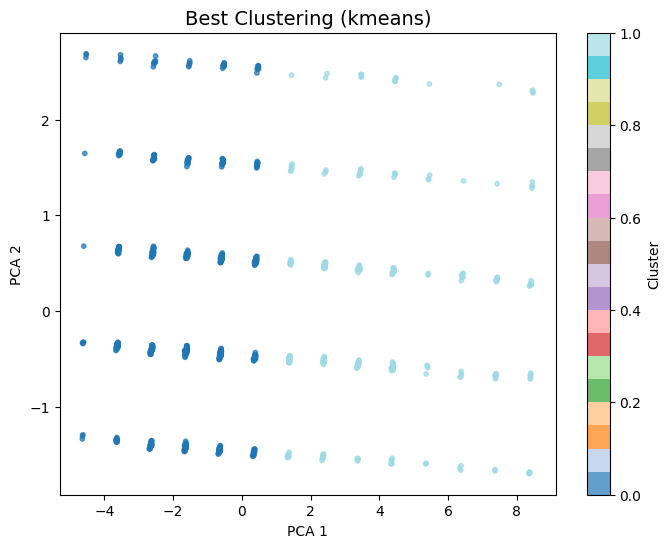

In [2]:
X = pd.read_csv("./Data/EncodedWomen_english_EFeatures.csv").values

# Define objective function for Optuna
def objective(trial):
    algo = trial.suggest_categorical("algorithm", ["kmeans", "agglomerative", "gmm", "dbscan"])
    metric_choice = trial.suggest_categorical("metric", ["ch", "db"])

    if algo == "kmeans":
        n_clusters = trial.suggest_int("n_clusters", 2, 600)
        model = KMeans(n_clusters=n_clusters, n_init="auto")
        labels = model.fit_predict(X)

    elif algo == "agglomerative":
        n_clusters = trial.suggest_int("n_clusters", 2, 600)
        model = AgglomerativeClustering(n_clusters=n_clusters)
        labels = model.fit_predict(X)

    elif algo == "gmm":
        n_clusters = trial.suggest_int("n_clusters", 2, 600)
        model = GaussianMixture(n_components=n_clusters)
        labels = model.fit_predict(X)

    else:  # DBSCAN
        eps = trial.suggest_float("eps", 0.1, 10.0, log=True)
        min_samples = trial.suggest_int("min_samples", 3, 600)
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(X)

        if len(np.unique(labels)) < 2:
            return -1e6

    # Evaluate
    if metric_choice == "ch":
        score = calinski_harabasz_score(X, labels)
    else:
        score = -davies_bouldin_score(X, labels)

    return score

# Run Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500)

print("Best Params:", study.best_params)
print("Best Score:", study.best_value)

# --- Refit best model ---
best = study.best_params
if best["algorithm"] == "kmeans":
    model = KMeans(n_clusters=best["n_clusters"], n_init="auto")
    labels = model.fit_predict(X)

elif best["algorithm"] == "agglomerative":
    model = AgglomerativeClustering(n_clusters=best["n_clusters"])
    labels = model.fit_predict(X)

elif best["algorithm"] == "gmm":
    model = GaussianMixture(n_components=best["n_clusters"])
    labels = model.fit_predict(X)

else:  # DBSCAN
    model = DBSCAN(eps=best["eps"], min_samples=best["min_samples"])
    labels = model.fit_predict(X)

# --- PCA for Visualization ---
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="tab20", s=10, alpha=0.7)
plt.title(f"Best Clustering ({best['algorithm']})", fontsize=14)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter, label="Cluster")
plt.show()


In [3]:
from sklearn.metrics import silhouette_score
final_silhouette = silhouette_score(X, labels)
print("Final Silhouette Score (best model):", final_silhouette)

Final Silhouette Score (best model): 0.4128159411707949


# Main Clustering cell
## Limit clusters to 25 < k < 250 so we avoid converging to 2

In [17]:
file_add = "./Data/EncodedWomen_english_EFeatures.csv"

df = pd.read_csv(file_add)
X = df.select_dtypes(include=np.number).values

def objective(trial):
    # 1. Preprocessing options
    use_scaler = trial.suggest_categorical("use_scaler", [True, False])
    use_pca = trial.suggest_categorical("use_pca", [True, False])
    pca_components = trial.suggest_int("pca_components", 3, min(50, X.shape[1])) if use_pca else None

    X_proc = X.copy()
    if use_scaler:
        X_proc = StandardScaler().fit_transform(X_proc)
    if use_pca:
        X_proc = PCA(n_components=pca_components).fit_transform(X_proc)

    # 2. Clustering algorithm
    algo = trial.suggest_categorical("algorithm", ["kmeans", "agglomerative", "gmm", "dbscan"])

    if algo in ["kmeans", "agglomerative", "gmm"]:
        n_clusters = trial.suggest_int("n_clusters", 25, 250)

    if algo == "kmeans":
        model = KMeans(n_clusters=n_clusters, n_init="auto")
        labels = model.fit_predict(X_proc)

    elif algo == "agglomerative":
        linkage = trial.suggest_categorical("linkage", ["ward", "complete", "average", "single"])
        metric = trial.suggest_categorical("metric" , ["cosine", "euclidean", "cityblock"])
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = model.fit_predict(X_proc)

    elif algo == "gmm":
        model = GaussianMixture(n_components=n_clusters)
        labels = model.fit_predict(X_proc)

    else:
        eps = trial.suggest_float("eps", 0.1, 10.0, log=True)
        min_samples = trial.suggest_int("min_samples", 3, 20)
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(X_proc)

        if len(np.unique(labels)) < 2:
            return -1e6
            
    ch_score = calinski_harabasz_score(X_proc, labels)
    db_score = davies_bouldin_score(X_proc, labels)

    # combined_score = ch_score - db_score * 100
    combined_score = silhouette_score(X_proc, labels)
    return combined_score

study = optuna.create_study(direction="maximize" , storage="sqlite:///db.sqlite3")
study.optimize(objective, n_trials=500)

print("Best Params:", study.best_params)
print("Best Combined Score:", study.best_value)

best = study.best_params
X_proc = X.copy()
if best["use_scaler"]:
    X_proc = StandardScaler().fit_transform(X_proc)
if best["use_pca"]:
    X_proc = PCA(n_components=best["pca_components"]).fit_transform(X_proc)

algo = best["algorithm"]
if algo == "kmeans":
    model = KMeans(n_clusters=best["n_clusters"], n_init="auto")
    labels = model.fit_predict(X_proc)
elif algo == "agglomerative":
    model = AgglomerativeClustering(n_clusters=best["n_clusters"], linkage=best["linkage"])
    labels = model.fit_predict(X_proc)
elif algo == "gmm":
    model = GaussianMixture(n_components=best["n_clusters"])
    labels = model.fit_predict(X_proc)
else:
    model = DBSCAN(eps=best["eps"], min_samples=best["min_samples"])
    labels = model.fit_predict(X_proc)

from sklearn.metrics import silhouette_score
if len(np.unique(labels)) > 1:
    final_silhouette = silhouette_score(X_proc, labels)
    print("Final Silhouette Score:", final_silhouette)

[I 2025-09-25 15:23:05,617] A new study created in RDB with name: no-name-5b2b484c-3aa7-4f89-b8ec-782826c58196
[I 2025-09-25 15:23:05,787] Trial 0 finished with value: 0.05389854567228379 and parameters: {'use_scaler': False, 'use_pca': True, 'pca_components': 22, 'algorithm': 'agglomerative', 'n_clusters': 70, 'linkage': 'complete', 'metric': 'cosine'}. Best is trial 0 with value: 0.05389854567228379.
[I 2025-09-25 15:23:05,946] Trial 1 finished with value: 0.1927530197297857 and parameters: {'use_scaler': True, 'use_pca': True, 'pca_components': 10, 'algorithm': 'kmeans', 'n_clusters': 61}. Best is trial 1 with value: 0.1927530197297857.
[I 2025-09-25 15:23:06,108] Trial 2 finished with value: 0.26907042170584766 and parameters: {'use_scaler': True, 'use_pca': True, 'pca_components': 10, 'algorithm': 'agglomerative', 'n_clusters': 113, 'linkage': 'ward', 'metric': 'euclidean'}. Best is trial 2 with value: 0.26907042170584766.
[I 2025-09-25 15:23:06,308] Trial 3 finished with value: 0

Best Params: {'use_scaler': True, 'use_pca': True, 'pca_components': 25, 'algorithm': 'agglomerative', 'n_clusters': 194, 'linkage': 'ward', 'metric': 'euclidean'}
Best Combined Score: 0.38645830277397897
Final Silhouette Score: 0.38645830277397897


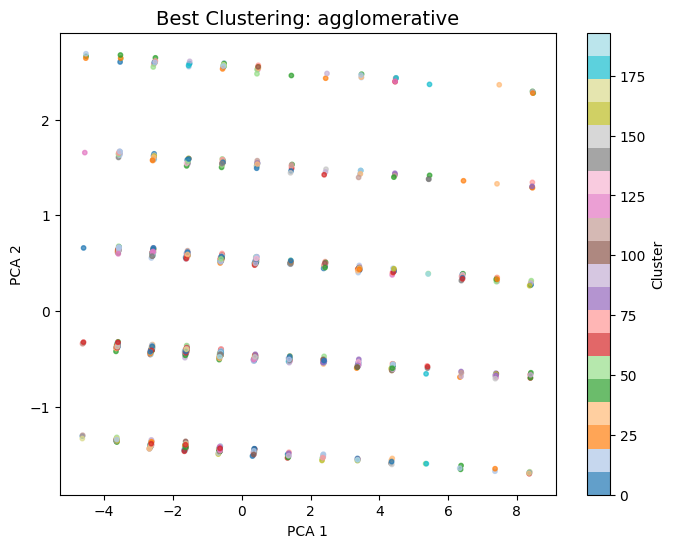

In [18]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap="tab20", s=10, alpha=0.7)
plt.title(f"Best Clustering: {algo}", fontsize=14)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter, label="Cluster")
plt.show()

In [1]:
import joblib
joblib.dump(model, f"./Data/best_{algo}_model.pkl")

NameError: name 'model' is not defined

In [20]:
N = 5  # top N trials
top_trials = study.trials_dataframe().sort_values("value", ascending=False).head(N)
print(top_trials)
second = study.trials[293]
params = second.params
print(second.params)
X_proc = X.copy()
if params.get("use_scaler", False):
    X_proc = StandardScaler().fit_transform(X_proc)
if params.get("use_pca", False):
    X_proc = PCA(n_components=params["pca_components"]).fit_transform(X_proc)
algo = params["algorithm"]
if algo == "kmeans":
    model = KMeans(n_clusters=params["n_clusters"], n_init="auto")
    labels = model.fit_predict(X_proc)
final_silhouette = silhouette_score(X_proc, labels)
print("Final Silhouette Score:", final_silhouette)

     number     value             datetime_start          datetime_complete  \
141     141  0.386458 2025-09-25 15:24:02.501264 2025-09-25 15:24:02.692786   
429     429  0.386458 2025-09-25 15:25:20.557203 2025-09-25 15:25:20.767673   
155     155  0.386458 2025-09-25 15:24:05.459587 2025-09-25 15:24:05.652074   
211     211  0.386312 2025-09-25 15:24:20.100760 2025-09-25 15:24:20.283307   
206     206  0.386312 2025-09-25 15:24:19.035606 2025-09-25 15:24:19.226111   

                  duration params_algorithm  params_eps params_linkage  \
141 0 days 00:00:00.191522    agglomerative         NaN           ward   
429 0 days 00:00:00.210470    agglomerative         NaN           ward   
155 0 days 00:00:00.192487    agglomerative         NaN           ward   
211 0 days 00:00:00.182547    agglomerative         NaN           ward   
206 0 days 00:00:00.190505    agglomerative         NaN           ward   

    params_metric  params_min_samples  params_n_clusters  \
141     euclidean   

In [15]:
# import joblib
# joblib.dump(model, f"best_{algo}_model.pkl")

['best_kmeans_model.pkl']

In [21]:
labeled_add = "./Data/MOCK_DATA-Women.csv"
output_add = "./Data/LabeledWomen.csv"
df_label = pd.read_csv(f"{labeled_add}")
df_label["Cluster"] = labels
df_label.to_csv("./Data/LabeledWomen.csv", index=False)